<a href="https://colab.research.google.com/github/Yeganehfrh/B2BC_hypnotic_interaction/blob/main/PLB_HYP_EEG_Preproecessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up the Environment

In [1]:
# install necessary tools
!pip install mne
!pip install PyDrive
!pip install mne_bids

     |████████████████████████████████| 6.9MB 6.1MB/s 
     |████████████████████████████████| 102kB 3.9MB/s 


In [2]:
# import necessary modules
import os
import numpy as np
import mne
import os.path as op
#from mne_bids.copyfiles import copyfile_brainvision
import pandas as pd

## Upload EEG data from Google Drive

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip or unrar if needed
# !unzip /content/drive/MyDrive/PLB-HYP\ OTKA1_EEG\ data/OTKA1_test0006.zip -d /content/
# !unrar e "/content/drive/MyDrive/rename_temporary/OTKA_rename.rar" "/content/"
# with open('/content/OTKA1_test0006/OTKA1_test0006.vmrk') as f:
#   content = f.read()
# print(content)

Archive:  /content/drive/MyDrive/PLB-HYP OTKA1_EEG data/OTKA1_test0006.zip
   creating: /content/OTKA1_test0006/
  inflating: /content/OTKA1_test0006/OTKA1_test0006.vmrk  
   creating: /content/__MACOSX/
   creating: /content/__MACOSX/OTKA1_test0006/
  inflating: /content/__MACOSX/OTKA1_test0006/._OTKA1_test0006.vmrk  
  inflating: /content/OTKA1_test0006/OTKA1_test0006.vhdr  
  inflating: /content/__MACOSX/OTKA1_test0006/._OTKA1_test0006.vhdr  
  inflating: /content/OTKA1_test0006/.DS_Store  
  inflating: /content/__MACOSX/OTKA1_test0006/._.DS_Store  
  inflating: /content/OTKA1_test0006/OTKA1_test0006.eeg  
  inflating: /content/__MACOSX/OTKA1_test0006/._OTKA1_test0006.eeg  


In [4]:
# Open EEG data
raw = mne.io.read_raw_brainvision('/content/drive/MyDrive/plb_hyp_eeg_test/plb-hyp-live0001.vhdr')
print(raw.info)

Extracting parameters from /content/drive/MyDrive/plb_hyp_eeg_test/plb-hyp-live0001.vhdr...
Setting channel info structure...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 60 EEG, 1 MISC
 custom_ref_applied: False
 dig: 60 items (60 EEG)
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2021-02-26 11:56:50 UTC
 nchan: 61
 projs: []
 sfreq: 1000.0 Hz
>


<ipython-input-4-1947da301d71>:2: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision('/content/drive/MyDrive/plb_hyp_eeg_test/plb-hyp-live0001.vhdr')


Effective window size : 2.048 (s)


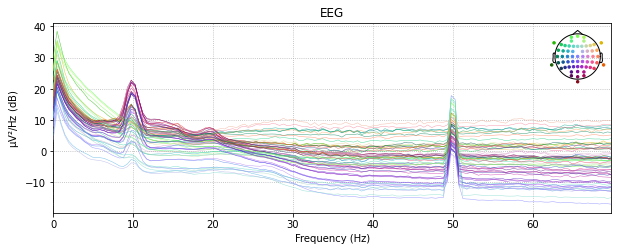

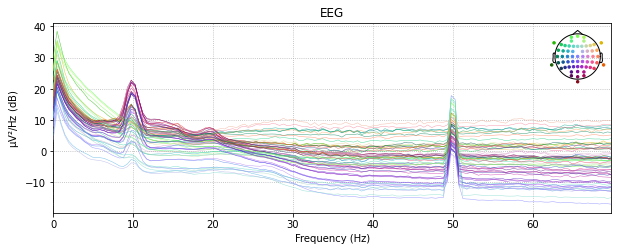

In [ ]:
# visualize data's power spectrum density
raw.plot_psd(fmax= 70)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


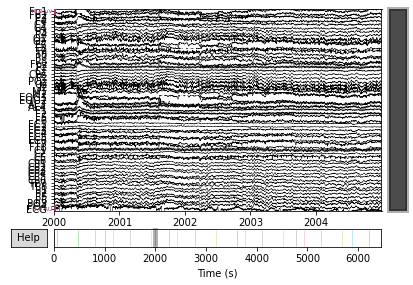

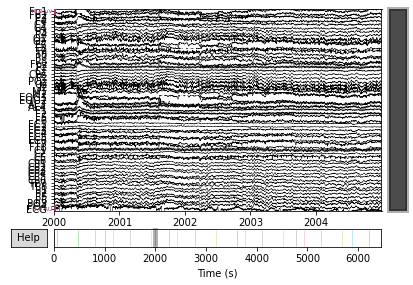

In [ ]:
raw.plot(duration=5, start= 2000, n_channels=61)

In [5]:
# Parsing the continuous data
# events summary
print(len(raw.annotations))
print(set(raw.annotations.duration))
print(set(raw.annotations.description))
print(raw.annotations.onset[0])

# create events array from annotations
events, event_dict = mne.events_from_annotations(raw)
print(event_dict)
print(events)

23
{0.001}
{'Stimulus/S  9', 'Stimulus/S  8', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  7', 'Stimulus/S  6', 'Stimulus/S  5', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S  2'}
0.0
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9']
{'New Segment/': 99999, 'Stimulus/S  1': 1, 'Stimulus/S  2': 2, 'Stimulus/S  3': 3, 'Stimulus/S  4': 4, 'Stimulus/S  5': 5, 'Stimulus/S  6': 6, 'Stimulus/S  7': 7, 'Stimulus/S  8': 8, 'Stimulus/S  9': 9}
[[      0       0   99999]
 [  60078       0       5]
 [  60079       0       1]
 [ 471827       0       2]
 [ 805410       0       3]
 [1016147       0       4]
 [1170821       0       5]
 [1506439       0       6]
 [1922816       0       7]
 [2273330       0       4]
 [2427968       0       5]
 [2791228       0       6]
 [3207605       0       7]
 [3611639       0       4]
 [3766273       0       5]
 [409

In [9]:
# epochs
epochs = mne.Epochs(raw, events)

Not setting metadata
Not setting metadata
23 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


## Rename and checking timing accuracy!

In [ ]:
# Rename the file if needed and upload them in Google drive
data_dir = '/content/drive/MyDrive/rename_temporary'
vhdr_file = op.join(data_dir, 'Confusion.vhdr')
vhdr_file_renamed = op.join(data_dir, 'hypnotist_confindu.vhdr')
copyfile_brainvision(vhdr_file, vhdr_file_renamed, verbose=True)

# Check that MNE-Python can read in both, the original as well as the renamed
# data (two files: their contents are the same apart from the name)
raw = mne.io.read_raw_brainvision(vhdr_file)
raw_renamed = mne.io.read_raw_brainvision(vhdr_file_renamed)

In [ ]:
# Check timing synchronization between EEG triggers and OpenSesame timestamps
## read csv file as pandas and find duration between timestamps
subject = pd.read_csv('/content/drive/MyDrive/plb_hyp_eeg_test/subject-1.csv')
subject = subject.tail(1)
triggers = [c for c in subject.columns if 'timestamp_' in c]
data = subject[triggers]
diff_csv = pd.to_datetime(data.iloc[0]).diff()

# trigInx = subject.columns.get_loc("timestamp_trigger_1")
# for i in range(5):
#   data = subject.iloc[:,trigInx:trigInx+i]
# data.insert(0,"timestamp_trigger_start",subject.loc[:,"timestamp_trigger_start"])

## read EEG marker files and calculate difference between timestamps
raw = mne.io.read_raw_brainvision('/content/drive/MyDrive/plb_hyp_eeg_test/plb-hyp-live0001.vhdr')
events, event_ids = mne.events_from_annotations(raw)

diff_eeg = np.ediff1d(events[:,0])
display(diff_csv)
display(pd.to_timedelta(diff_eeg,'ms').to_frame())

In [ ]:
data = data[['timestamp_trigger_1','timestamp_recording_posthyp_end']]
diff_csv = pd.to_datetime(data.iloc[0]).diff()

timestamp_trigger_1                                  NaT
timestamp_recording_posthyp_end   0 days 01:42:38.016796
Name: 17, dtype: timedelta64[ns]

In [ ]:
with open('/content/drive/MyDrive/plb_hyp_eeg_test/test_legacy.vmrk') as f:
  content = f.read()
print(content)

Brain Vision Data Exchange Marker File, Version 1.0

[Common Infos]
Codepage=UTF-8
DataFile=test_legacy.eeg

[Marker Infos]
; Each entry: Mk<Marker number>=<Type>,<Description>,<Position in data points>,
; <Size in data points>, <Channel number (0 = marker is related to all channels)>
; Fields are delimited by commas, some fields might be omitted (empty).
; Commas in type or description text are coded as "\1".
Mk1=New Segment,,1,1,0,20210220174458112327
Mk2=Stimulus,S  5,12896,1,0
Mk3=Stimulus,S  1,12897,1,0
Mk4=Stimulus,S  2,26288,1,0
Mk5=Stimulus,S  3,28102,1,0
Mk6=Stimulus,S  1,94547,1,0
Mk7=Stimulus,S  2,104455,1,0
Mk8=Stimulus,S  3,106525,1,0
Mk9=Stimulus,S  4,439950,1,0
Mk10=Stimulus,S  5,487872,1,0



In [ ]:
magic_number = 33.293810

In [ ]:
# xpiriment
pd.to_timedelta(diff_eeg[3],'ms')

Timedelta('0 days 00:05:33.425000')

# References
 - [MNE Python tutorials](https://mne.tools/stable/index.html)
